In [1]:
import os 
import random
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import seaborn as sns
from pathlib import Path
from torchvision import transforms
import torch

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

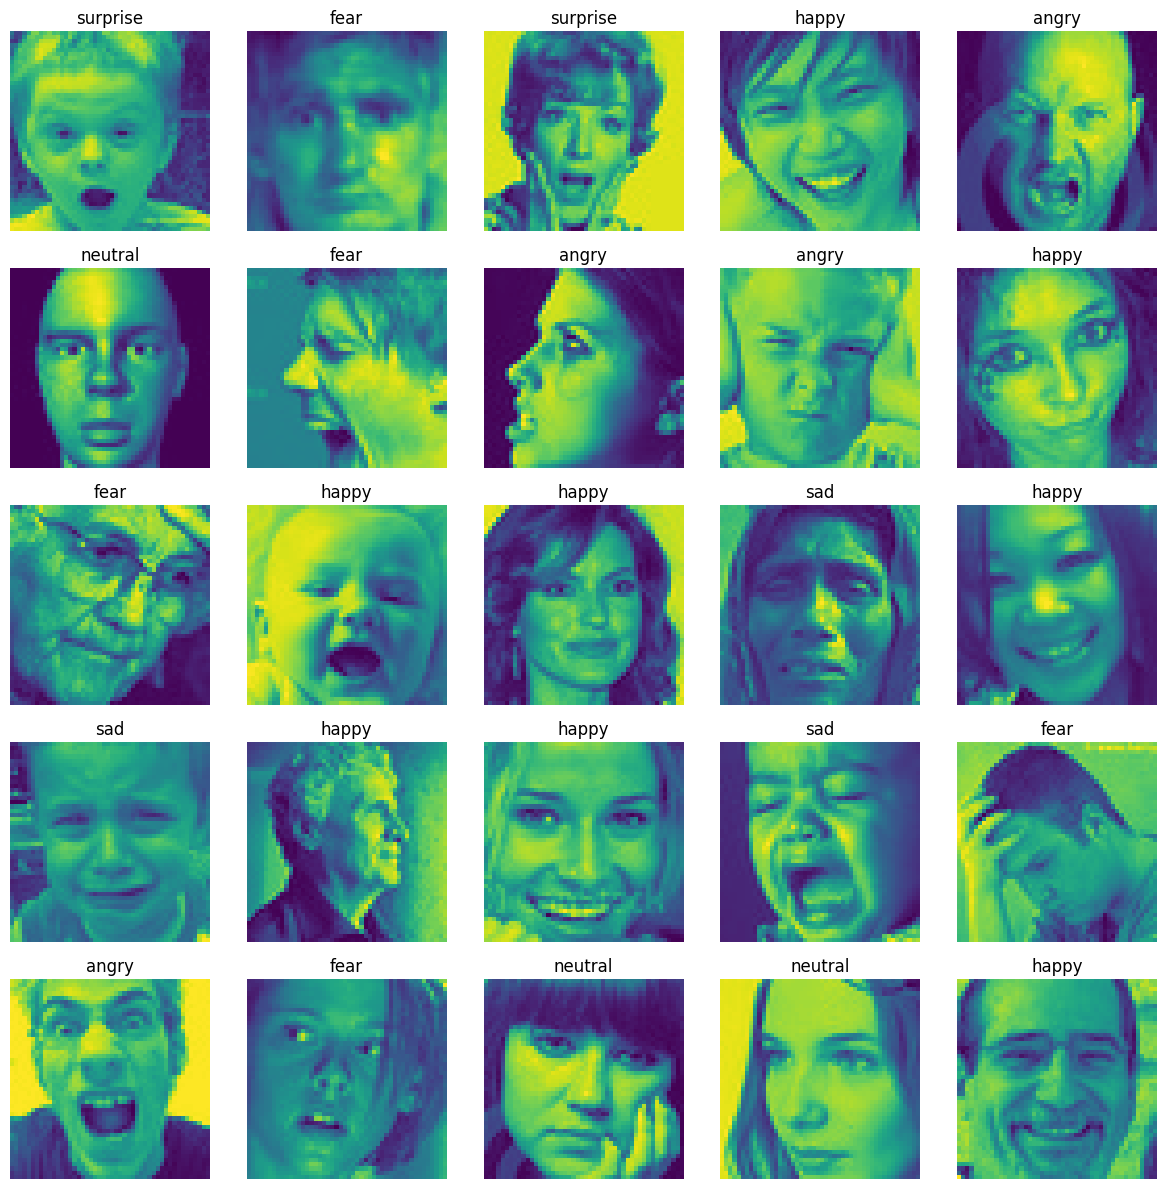

In [3]:
image_path="../../images"
train_dir=os.path.join(image_path,"train")
test_dir=os.path.join(image_path,"validation")

if not os.path.exists(train_dir) or not os.path.exists(test_dir):
    raise FileNotFoundError(f"Training or validation directory does not exist. If you have downloaded the dataset, please check the training images are in {train_dir} and validation images are in {test_dir}")

# Get list of classes and image paths
classes = os.listdir(train_dir)
all_images = []

for cls in classes:
    class_path = os.path.join(train_dir, cls)
    images = [os.path.join(class_path, img) for img in os.listdir(class_path)]
    all_images.extend(images)

# Randomly select 25 images
random_images = random.sample(all_images, 25)

# Plot the 5x5 grid
plt.figure(figsize=(12, 12))

for i, img_path in enumerate(random_images):
    img = Image.open(img_path)
    plt.subplot(5, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(os.path.basename(os.path.dirname(img_path)))  # show class label

plt.tight_layout()
plt.show()

/tmp/ipykernel_140785/148879698.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_counts, x='Class', y='Image Count', palette='Set2')


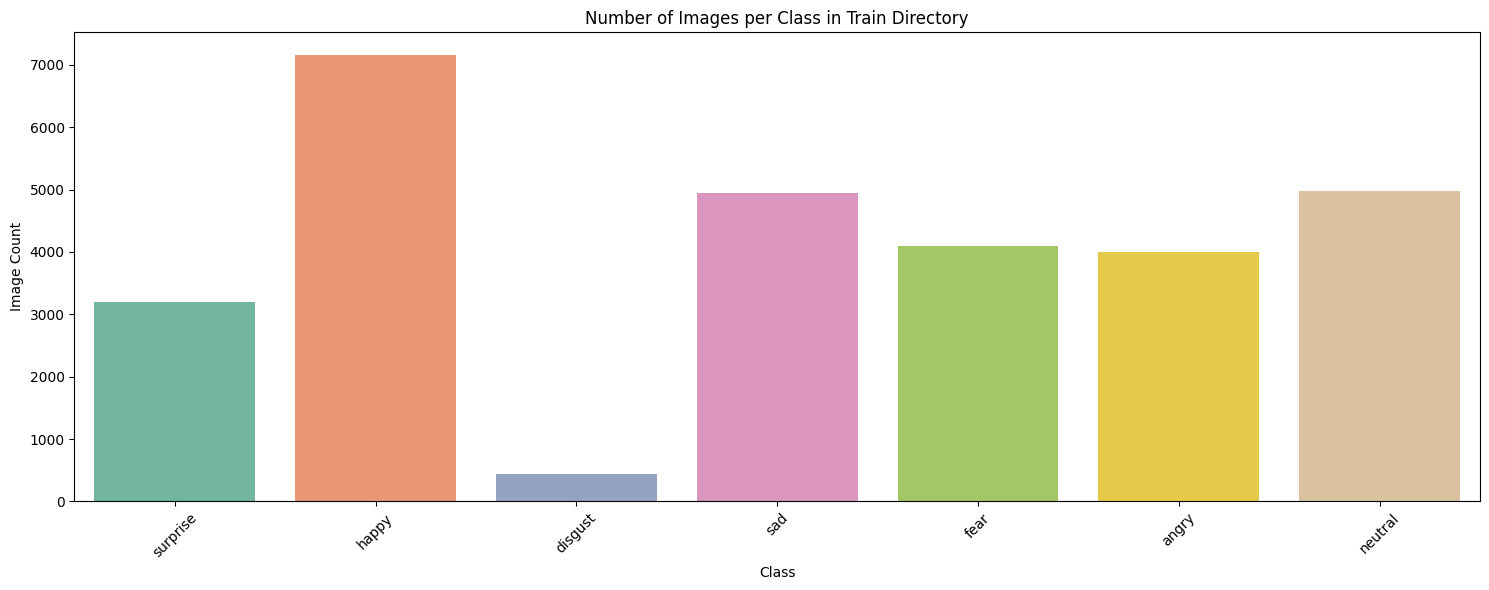

In [4]:
class_counts = {}

for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        count = len(os.listdir(class_path))
        class_counts[class_name] = count

# Convert to DataFrame
df_counts = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Image Count'])

# Plot using Seaborn
plt.figure(figsize=(15, 6))
sns.barplot(data=df_counts, x='Class', y='Image Count', palette='Set2')
plt.title("Number of Images per Class in Train Directory")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_140785/2247343099.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_counts, x='Class', y='Image Count', palette='Dark2')


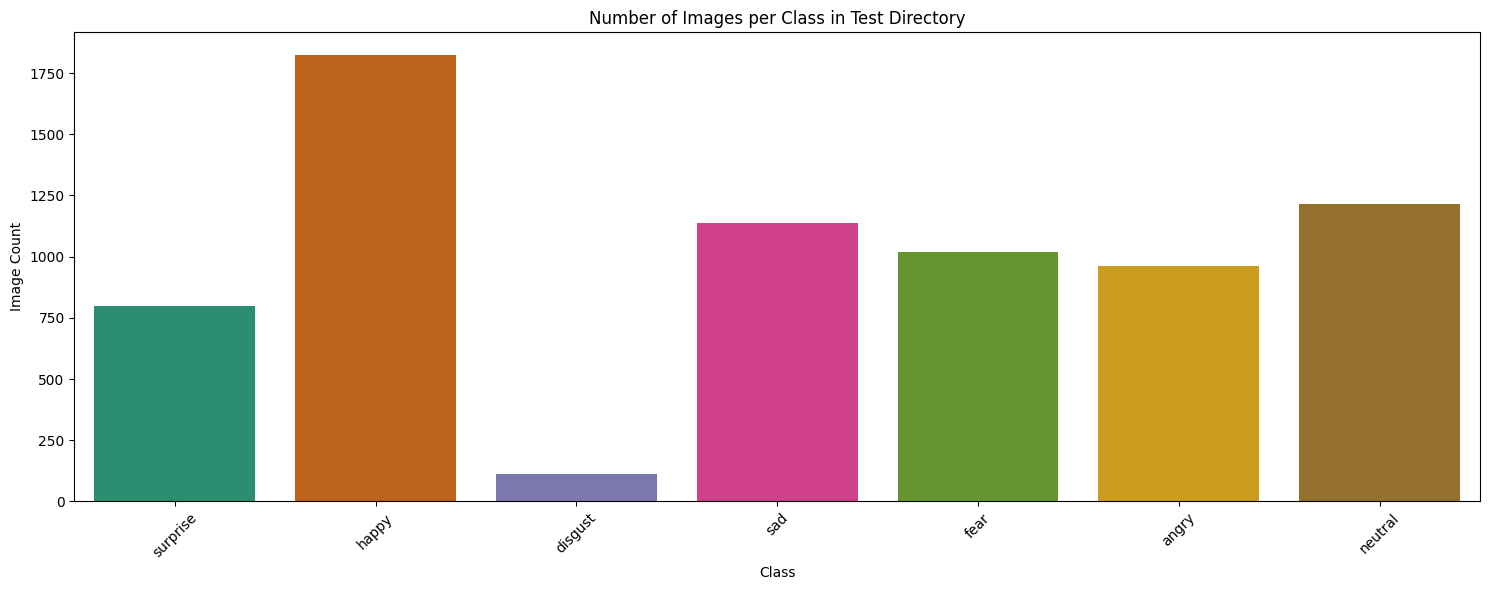

In [5]:
class_counts = {}

for class_name in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_name)
    if os.path.isdir(class_path):
        count = len(os.listdir(class_path))
        class_counts[class_name] = count

# Convert to DataFrame
df_counts = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Image Count'])

# Plot using Seaborn
plt.figure(figsize=(15, 6))
sns.barplot(data=df_counts, x='Class', y='Image Count', palette='Dark2')
plt.title("Number of Images per Class in Test Directory")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.Lambda(lambda image: image.convert("RGB")),  # always 3 channels
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
])
image_path=Path(image_path)
image_path_list = list(image_path.glob("*/*/*.jpg"))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0836544..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9466565..1.8208281].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0836544..2.3785625].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.4671633..1.2108063].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0836544..2.3262744].


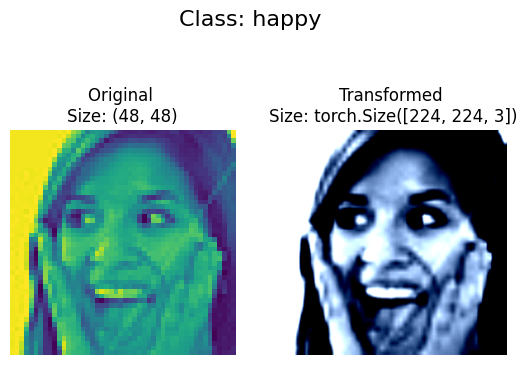

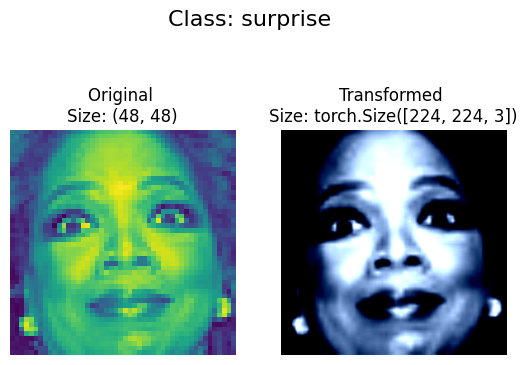

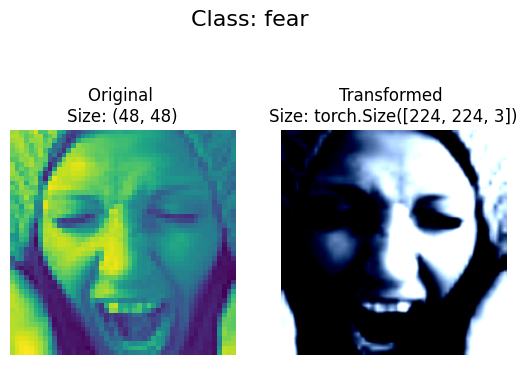

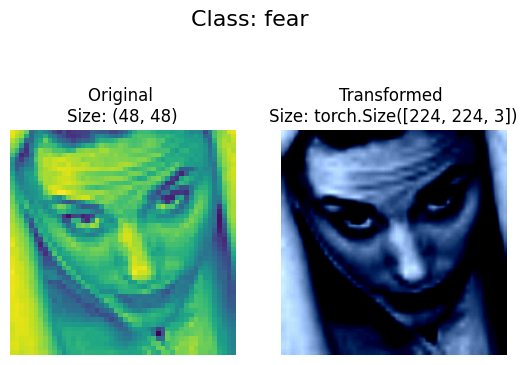

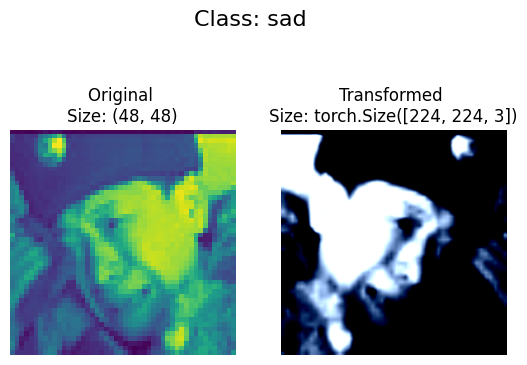

In [7]:
def plot_transformed_images(image_paths, transform, n=5, seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, transform=data_transform, n=5)


In [8]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

train_data = datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 28821
    Root location: ../../images/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               Lambda()
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 7066
    Root location: ../../images/validation
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               Lambda()
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


In [9]:
class_names = train_data.classes
class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [10]:
class_dict = train_data.class_to_idx
class_dict

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [11]:
len(train_data), len(test_data)

(28821, 7066)

In [12]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")


Image tensor:
tensor([[[-0.8849, -0.8849, -0.8849,  ..., -1.4329, -1.4329, -1.4329],
         [-0.8849, -0.8849, -0.8849,  ..., -1.4329, -1.4329, -1.4329],
         [-0.8849, -0.8849, -0.8849,  ..., -1.4329, -1.4329, -1.4329],
         ...,
         [-0.7993, -0.7993, -0.7993,  ..., -0.7137, -0.7308, -0.7308],
         [-0.7993, -0.7993, -0.7993,  ..., -0.6965, -0.7137, -0.7137],
         [-0.7993, -0.7993, -0.7993,  ..., -0.6965, -0.7137, -0.7137]],

        [[-0.7752, -0.7752, -0.7752,  ..., -1.3354, -1.3354, -1.3354],
         [-0.7752, -0.7752, -0.7752,  ..., -1.3354, -1.3354, -1.3354],
         [-0.7752, -0.7752, -0.7752,  ..., -1.3354, -1.3354, -1.3354],
         ...,
         [-0.6877, -0.6877, -0.6877,  ..., -0.6001, -0.6176, -0.6176],
         [-0.6877, -0.6877, -0.6877,  ..., -0.5826, -0.6001, -0.6001],
         [-0.6877, -0.6877, -0.6877,  ..., -0.5826, -0.6001, -0.6001]],

        [[-0.5495, -0.5495, -0.5495,  ..., -1.1073, -1.1073, -1.1073],
         [-0.5495, -0.5495, -0.

In [13]:
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=8, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=8, 
                             num_workers=1, 
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1553e9650d00>,
 <torch.utils.data.dataloader.DataLoader at 0x1553e9650fd0>)

In [14]:
# Replace ResNet-18 with YOLOv8 nano (classification)
import os, sys, subprocess
device = "cuda" if torch.cuda.is_available() else "cpu"

try:
    from ultralytics import YOLO
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "ultralytics"])
    from ultralytics import YOLO

# Ultralytics classification expects a `train/` and `val/` directory.
# If your dataset uses `validation/`, make a lightweight symlink `val` -> `validation`.
val_alias = os.path.join(image_path, "val")
if not os.path.exists(val_alias) and os.path.exists(test_dir):
    try:
        os.symlink(test_dir, val_alias)
        print(f"Created symlink: {val_alias} -> {test_dir}")
    except FileExistsError:
        pass

# Initialize YOLOv8 nano classifier (pretrained on ImageNet1K)
yolo_model = YOLO("yolov8n-cls.pt")
print(yolo_model)


YOLO(
  (model): ClassificationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_

In [15]:
# Training hyperparameters (kept similar to original)
num_epochs = 30
batch_size = 8
imgsz = 224  # keep original 224x224


In [16]:
# Train YOLOv8 nano classifier using Ultralytics pipeline
results = yolo_model.train(
    data=image_path,     # folder with `train/` and `val/`
    epochs=num_epochs,
    imgsz=imgsz,
    batch=batch_size,
    device=0 if device == "cuda" else "cpu"
)
print(results)


Ultralytics 8.3.185 🚀 Python-3.9.13 torch-2.8.0+cu128 CUDA:0 (NVIDIA A100-SXM4-80GB, 81154MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=../../images, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tr

train: Scanning /work/projects/mhahsler/course_recomm/allocation001/AI_Club/projects/mood-recognition-yolo/i


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3.6±0.2 MB/s, size: 1.6 KB)


val: Scanning /work/projects/mhahsler/course_recomm/allocation001/AI_Club/projects/mood-recognition-yolo/ima


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 8 dataloader workers
Logging results to /work/projects/mhahsler/course_recomm/allocation001/AI_Club/projects/mood-recognition-yolo/runs/classify/train3
Starting training for 30 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:03<00:00, 139.11it/s]

                   all      0.493      0.969

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:02<00:00, 159.77it/s]

                   all      0.573      0.976



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:02<00:00, 161.45it/s]

                   all      0.568      0.983



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:02<00:00, 163.42it/s]


                   all      0.601      0.985

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:02<00:00, 162.72it/s]

                   all      0.601      0.985



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:02<00:00, 159.99it/s]


                   all      0.615      0.987

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:02<00:00, 158.71it/s]

                   all      0.629       0.99



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:02<00:00, 158.81it/s]


                   all      0.639      0.988

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:02<00:00, 163.36it/s]

                   all      0.647      0.989



      Epoch    GPU_mem       loss  Instances       Size


      10/30     0.176G      1.059          5        224: 100%|██████████| 3603/3603 [00:55<00:00, 65.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:02<00:00, 160.68it/s]

                   all       0.65      0.991



      Epoch    GPU_mem       loss  Instances       Size


      11/30     0.176G      1.051          5        224: 100%|██████████| 3603/3603 [00:54<00:00, 66.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:02<00:00, 160.54it/s]


                   all      0.659       0.99

      Epoch    GPU_mem       loss  Instances       Size


      12/30     0.182G      1.038          5        224: 100%|██████████| 3603/3603 [00:54<00:00, 65.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:02<00:00, 161.78it/s]


                   all      0.663      0.991

      Epoch    GPU_mem       loss  Instances       Size


      13/30     0.182G      1.013          5        224: 100%|██████████| 3603/3603 [00:54<00:00, 66.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:02<00:00, 161.19it/s]


                   all      0.665      0.992

      Epoch    GPU_mem       loss  Instances       Size


      14/30     0.182G      1.006          5        224: 100%|██████████| 3603/3603 [00:53<00:00, 67.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:02<00:00, 160.82it/s]

                   all      0.662      0.992



      Epoch    GPU_mem       loss  Instances       Size


      15/30     0.182G     0.9904          5        224: 100%|██████████| 3603/3603 [00:52<00:00, 68.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:02<00:00, 161.80it/s]


                   all      0.667      0.991

      Epoch    GPU_mem       loss  Instances       Size


      16/30     0.182G     0.9781          5        224: 100%|██████████| 3603/3603 [00:52<00:00, 68.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:02<00:00, 162.03it/s]


                   all       0.67      0.992

      Epoch    GPU_mem       loss  Instances       Size


      17/30     0.188G      0.963          5        224: 100%|██████████| 3603/3603 [00:52<00:00, 68.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:02<00:00, 160.08it/s]

                   all      0.679      0.993



      Epoch    GPU_mem       loss  Instances       Size


      18/30     0.188G     0.9514          5        224: 100%|██████████| 3603/3603 [00:54<00:00, 66.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:02<00:00, 162.85it/s]

                   all      0.678      0.994



      Epoch    GPU_mem       loss  Instances       Size


      19/30     0.188G     0.9361          5        224: 100%|██████████| 3603/3603 [00:53<00:00, 66.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:02<00:00, 161.65it/s]


                   all      0.682      0.992

      Epoch    GPU_mem       loss  Instances       Size


      20/30     0.188G     0.9259          5        224: 100%|██████████| 3603/3603 [00:53<00:00, 67.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:02<00:00, 160.46it/s]

                   all       0.69      0.993



      Epoch    GPU_mem       loss  Instances       Size


      21/30     0.188G     0.9108          5        224: 100%|██████████| 3603/3603 [00:54<00:00, 65.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:02<00:00, 163.57it/s]

                   all      0.691      0.993



      Epoch    GPU_mem       loss  Instances       Size


      22/30     0.188G     0.8955          5        224: 100%|██████████| 3603/3603 [00:54<00:00, 66.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:02<00:00, 157.94it/s]

                   all      0.691      0.993



      Epoch    GPU_mem       loss  Instances       Size


      23/30     0.188G      0.878          5        224: 100%|██████████| 3603/3603 [00:54<00:00, 65.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:02<00:00, 161.87it/s]

                   all      0.694      0.994



      Epoch    GPU_mem       loss  Instances       Size


      24/30     0.188G     0.8644          5        224: 100%|██████████| 3603/3603 [00:56<00:00, 64.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:02<00:00, 161.40it/s]


                   all      0.695      0.993

      Epoch    GPU_mem       loss  Instances       Size


      25/30     0.188G     0.8505          5        224: 100%|██████████| 3603/3603 [00:53<00:00, 67.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:02<00:00, 161.40it/s]


                   all      0.698      0.993

      Epoch    GPU_mem       loss  Instances       Size


      26/30     0.188G     0.8342          5        224: 100%|██████████| 3603/3603 [00:54<00:00, 65.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:02<00:00, 158.43it/s]

                   all        0.7      0.994



      Epoch    GPU_mem       loss  Instances       Size


      27/30     0.193G     0.8076          5        224: 100%|██████████| 3603/3603 [00:53<00:00, 67.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:02<00:00, 156.44it/s]


                   all      0.699      0.994

      Epoch    GPU_mem       loss  Instances       Size


      28/30     0.193G     0.8033          5        224: 100%|██████████| 3603/3603 [00:54<00:00, 66.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:02<00:00, 164.52it/s]

                   all        0.7      0.993



      Epoch    GPU_mem       loss  Instances       Size


      29/30     0.193G      0.789          5        224: 100%|██████████| 3603/3603 [00:54<00:00, 66.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:02<00:00, 161.44it/s]


                   all        0.7      0.993

      Epoch    GPU_mem       loss  Instances       Size


      30/30     0.193G     0.7713          5        224: 100%|██████████| 3603/3603 [00:55<00:00, 65.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:02<00:00, 159.64it/s]

                   all      0.702      0.993



30 epochs completed in 0.479 hours.
Optimizer stripped from /work/projects/mhahsler/course_recomm/allocation001/AI_Club/projects/mood-recognition-yolo/runs/classify/train3/weights/last.pt, 3.0MB
Optimizer stripped from /work/projects/mhahsler/course_recomm/allocation001/AI_Club/projects/mood-recognition-yolo/runs/classify/train3/weights/best.pt, 3.0MB

Validating /work/projects/mhahsler/course_recomm/allocation001/AI_Club/projects/mood-recognition-yolo/runs/classify/train3/weights/best.pt...
Ultralytics 8.3.185 🚀 Python-3.9.13 torch-2.8.0+cu128 CUDA:0 (NVIDIA A100-SXM4-80GB, 81154MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,443,847 parameters, 0 gradients, 3.3 GFLOPs
train: /work/projects/mhahsler/course_recomm/allocation001/AI_Club/projects/mood-recognition-yolo/images/train... found 28821 images in 7 classes ✅ 
val: /work/projects/mhahsler/course_recomm/allocation001/AI_Club/projects/mood-recognition-yolo/images/validation... found 7066 images in 7 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 442/442 [00:02<00:00, 170.68it/s]


                   all      0.702      0.993
Speed: 0.0ms preprocess, 0.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /work/projects/mhahsler/course_recomm/allocation001/AI_Club/projects/mood-recognition-yolo/runs/classify/train3
ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x1553e8c0adf0>
curves: []
curves_results: []
fitness: 0.8477214872837067
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7022360563278198, 'metrics/accuracy_top5': 0.9932069182395935, 'fitness': 0.8477214872837067}
save_dir: PosixPath('/work/projects/mhahsler/course_recomm/allocation001/AI_Club/projects/mood-recognition-yolo/runs/classify/train3')
speed: {'preprocess': 0.040144898867808726, 'inference': 0.20193759138579118, 'loss': 0.0007034395986146743, 'postprocess': 0.0009152359739599705}
task: 'classify'
top1: 0.7022360563278198
top5: 0.9932069

In [17]:
# Validate/Evaluate on the `val/` split
metrics = yolo_model.val(
    data=image_path,
    imgsz=imgsz,
    batch=batch_size,
    device=0 if device == "cuda" else "cpu"
)
print("Validation metrics:", metrics)


Ultralytics 8.3.185 🚀 Python-3.9.13 torch-2.8.0+cu128 CUDA:0 (NVIDIA A100-SXM4-80GB, 81154MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,443,847 parameters, 0 gradients, 3.3 GFLOPs
train: /work/projects/mhahsler/course_recomm/allocation001/AI_Club/projects/mood-recognition-yolo/images/train... found 28821 images in 7 classes ✅ 
val: /work/projects/mhahsler/course_recomm/allocation001/AI_Club/projects/mood-recognition-yolo/images/validation... found 7066 images in 7 classes ✅ 
test: None...
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2.6±0.4 MB/s, size: 1.6 KB)


val: Scanning /work/projects/mhahsler/course_recomm/allocation001/AI_Club/projects/mood-recognition-yolo/ima
               classes   top1_acc   top5_acc: 100%|██████████| 884/884 [00:03<00:00, 264.71it/s]


                   all      0.702      0.993
Speed: 0.0ms preprocess, 0.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /work/projects/mhahsler/course_recomm/allocation001/AI_Club/projects/mood-recognition-yolo/runs/classify/train32
Validation metrics: ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x1552bd38b7f0>
curves: []
curves_results: []
fitness: 0.8477214872837067
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7022360563278198, 'metrics/accuracy_top5': 0.9932069182395935, 'fitness': 0.8477214872837067}
save_dir: PosixPath('/work/projects/mhahsler/course_recomm/allocation001/AI_Club/projects/mood-recognition-yolo/runs/classify/train32')
speed: {'preprocess': 0.040898709824193295, 'inference': 0.35144075089124527, 'loss': 0.0017501578642281567, 'postprocess': 0.002257026221361691}
task: 'classify'
top1: 0.70223605632

In [18]:
# Plot training and validation metrics
def plot_metrics(metrics):
    epochs = range(1, len(metrics["train_losses"]) + 1)
    
    # Plot Loss
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, metrics["train_losses"], label="Train Loss", marker='o')
    plt.plot(epochs, metrics["val_losses"], label="Validation Loss", marker='o')
    plt.title("Training and Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    
    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, metrics["train_accuracies"], label="Train Accuracy", marker='o')
    plt.plot(epochs, metrics["val_accuracies"], label="Validation Accuracy", marker='o')
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Plot the metrics
plot_metrics(metrics)

TypeError: 'ClassifyMetrics' object is not subscriptable

Using: ../../runs/classify/train3/results.csv
Columns: ['epoch', 'time', 'train/loss', 'metrics/accuracy_top1', 'metrics/accuracy_top5', 'val/loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


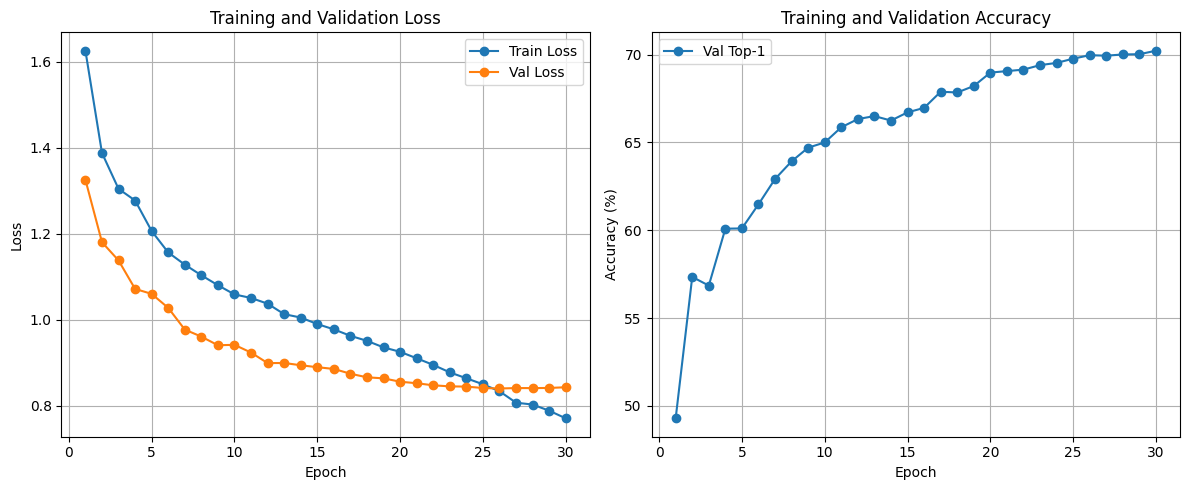

In [19]:
from glob import glob
import os, pandas as pd
import matplotlib.pyplot as plt

def plot_ultralytics_training_curves(run_csv = None):
    # Find latest classify run CSV if not provided
    if run_csv is None:
        csvs = sorted(glob("../../runs/classify/*/results.csv"), key=os.path.getmtime)
        if not csvs:
            raise FileNotFoundError("No runs/classify/*/results.csv found. Did training finish?")
        run_csv = csvs[-1]

    df = pd.read_csv(run_csv)
    print("Using:", run_csv)
    print("Columns:", list(df.columns))

    # Column guesses (robust to small naming differences)
    epoch_col = "epoch" if "epoch" in df.columns else df.columns[0]

    def pick(*cands):
        for c in cands:
            if c in df.columns: return c
        # fuzzy fallback
        for c in df.columns:
            if all(x in c for x in cands[0].split("/")): return c
        return None

    train_loss_col = pick("train/loss", "loss/train", "train/cls_loss", "train_loss")
    val_loss_col   = pick("val/loss", "loss/val", "val/cls_loss", "val_loss")

    # accuracy: YOLO cls logs top1 under metrics/accuracy_top1
    train_acc_col  = pick("train/acc", "accuracy/train", "train_accuracy")
    val_acc_col    = pick("metrics/accuracy_top1", "val/acc", "accuracy/val", "val_accuracy")

    # Plot
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    if train_loss_col: plt.plot(df[epoch_col], df[train_loss_col], marker='o', label="Train Loss")
    if val_loss_col:   plt.plot(df[epoch_col], df[val_loss_col],   marker='o', label="Val Loss")
    plt.title("Training and Validation Loss"); plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.grid(True); plt.legend()

    plt.subplot(1,2,2)
    if train_acc_col:
        y = df[train_acc_col]; 
        plt.plot(df[epoch_col], (y*100 if y.max()<=1 else y), marker='o', label="Train Acc")
    if val_acc_col:
        y = df[val_acc_col];
        plt.plot(df[epoch_col], (y*100 if y.max()<=1 else y), marker='o', label="Val Top-1")
    plt.title("Training and Validation Accuracy"); plt.xlabel("Epoch"); plt.ylabel("Accuracy (%)"); plt.grid(True); plt.legend()

    plt.tight_layout(); plt.show()

plot_ultralytics_training_curves()

In [20]:
from tqdm import tqdm
import torch, numpy as np
from sklearn.preprocessing import label_binarize

IMAGENET_MEAN = (0.485, 0.456, 0.406)
IMAGENET_STD  = (0.229, 0.224, 0.225)

def get_preds_and_labels_yolo(model, dataloader, device="cuda", undo_imagenet_norm=True, return_probs=True):
    """
    Works with Ultralytics YOLOv8 classification models.
    - undo_imagenet_norm=True: reverses torchvision Normalize(mean,std) to 0..1
    - return_probs=True: also returns per-class probabilities (n_samples x n_classes)
    """
    model.eval()
    all_preds, all_labels = [], []
    all_probs = [] if return_probs else None

    mean = torch.tensor(IMAGENET_MEAN, device=device)[None, :, None, None]
    std  = torch.tensor(IMAGENET_STD,  device=device)[None, :, None, None]

    with torch.no_grad():
        for images, labels in tqdm(dataloader, desc="Collecting predictions"):
            images = images.to(device)

            # Undo torchvision.Normalize if you used it in your dataset
            if undo_imagenet_norm:
                images = (images * std + mean).clamp(0, 1)

            # Ultralytics returns a list[Results], one per image
            results = model(images, verbose=False)

            for res in results:
                all_preds.append(int(res.probs.top1))  # predicted class index
                if return_probs:
                    # res.probs.data: tensor (num_classes,) of softmax probs
                    all_probs.append(res.probs.data.detach().cpu().numpy())

            all_labels.extend(labels.cpu().numpy().tolist())

    if return_probs:
        return all_preds, all_labels, np.vstack(all_probs)
    return all_preds, all_labels

Accuracy: 0.7019530144353241
Macro F1: 0.6837790108495162
              precision    recall  f1-score   support

           0       0.63      0.64      0.64       960
           1       0.83      0.61      0.70       111
           2       0.58      0.48      0.52      1018
           3       0.89      0.90      0.90      1825
           4       0.60      0.72      0.66      1216
           5       0.59      0.56      0.57      1139
           6       0.80      0.78      0.79       797

    accuracy                           0.70      7066
   macro avg       0.70      0.67      0.68      7066
weighted avg       0.70      0.70      0.70      7066



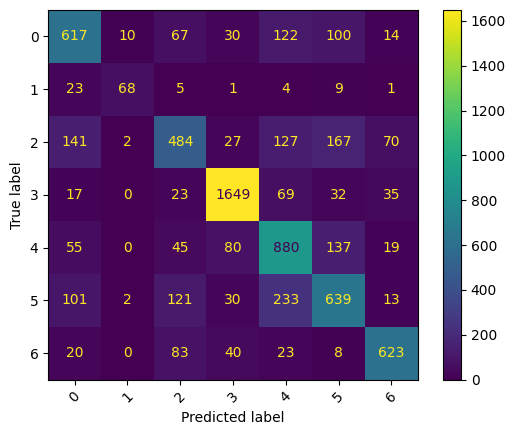

Macro ROC-AUC (OvR): 0.9292710634771747
Macro PR-AUC: 0.7343173511030822


In [22]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve,
    average_precision_score
)
device = "cuda" if torch.cuda.is_available() else "cpu"
preds, labels, probs = get_preds_and_labels_yolo(yolo_model, test_dataloader, device=device, undo_imagenet_norm=True, return_probs=True)

# Standard metrics
print("Accuracy:", accuracy_score(labels, preds))
print("Macro F1:", f1_score(labels, preds, average="macro"))
print(classification_report(labels, preds))

# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(labels, preds)
ConfusionMatrixDisplay(cm).plot(xticks_rotation=45)
plt.show()

# ROC/AUC (one-vs-rest)
n_classes = probs.shape[1]
y_bin = label_binarize(labels, classes=list(range(n_classes)))
print("Macro ROC-AUC (OvR):", roc_auc_score(y_bin, probs, average="macro", multi_class="ovr"))
print("Macro PR-AUC:", average_precision_score(y_bin, probs, average="macro"))

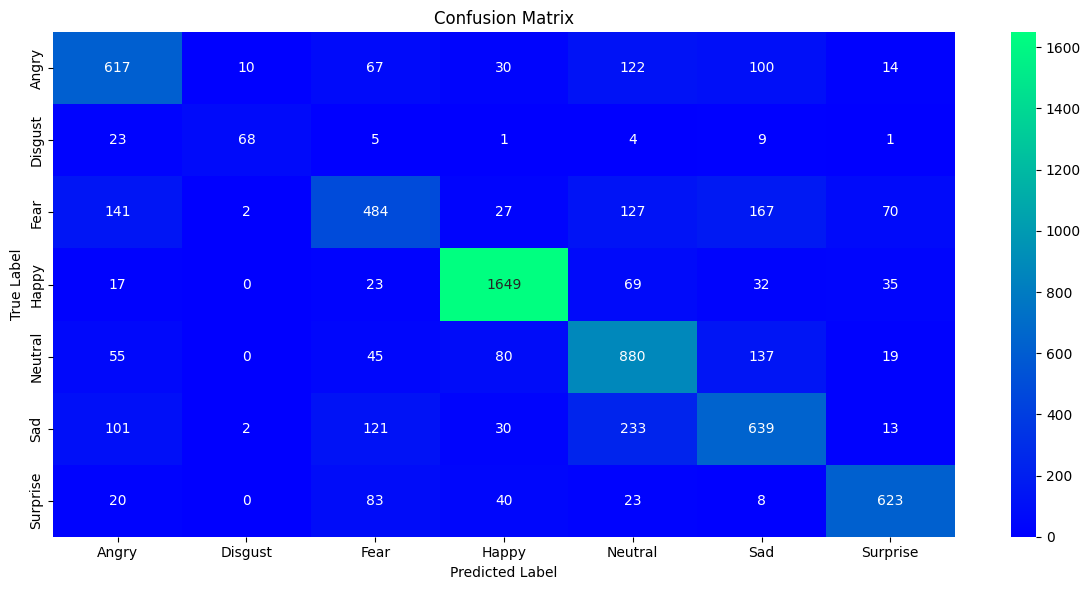

In [23]:
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
cm = confusion_matrix(labels, preds)

plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="winter",xticklabels=class_names,yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [24]:
print(classification_report(labels, preds, target_names=class_names))

              precision    recall  f1-score   support

       Angry       0.63      0.64      0.64       960
     Disgust       0.83      0.61      0.70       111
        Fear       0.58      0.48      0.52      1018
       Happy       0.89      0.90      0.90      1825
     Neutral       0.60      0.72      0.66      1216
         Sad       0.59      0.56      0.57      1139
    Surprise       0.80      0.78      0.79       797

    accuracy                           0.70      7066
   macro avg       0.70      0.67      0.68      7066
weighted avg       0.70      0.70      0.70      7066



In [25]:
from sklearn.preprocessing import label_binarize
import numpy as np
import torch
from tqdm import tqdm

# If your dataloader used torchvision.Normalize(IMAGENET_MEAN, IMAGENET_STD),
# undo it so inputs are 0..1 (recommended for YOLO cls).
IMAGENET_MEAN = (0.485, 0.456, 0.406)
IMAGENET_STD  = (0.229, 0.224, 0.225)
mean = torch.tensor(IMAGENET_MEAN, device=device)[None, :, None, None]
std  = torch.tensor(IMAGENET_STD,  device=device)[None, :, None, None]

yolo_model.eval()
all_probs = []
all_labels = []

with torch.no_grad():
    for images, labels in tqdm(test_dataloader, desc="Collecting probs for ROC"):
        images = images.to(device)

        # Undo ImageNet normalization → [0,1]
        images = (images * std + mean).clamp(0, 1)

        # YOLO returns list[Results], length == batch size
        results = yolo_model(images, verbose=False)

        for res in results:
            # softmax probs are here
            all_probs.append(res.probs.data.detach().cpu().numpy())  # shape (C,)
        all_labels.extend(labels.cpu().numpy().tolist())

all_probs = np.vstack(all_probs)           # shape (N, C)
all_labels = np.array(all_labels)          # shape (N,)
n_classes = all_probs.shape[1]

# One-hot for OvR metrics
labels_onehot = label_binarize(all_labels, classes=np.arange(n_classes))

from sklearn.metrics import roc_auc_score, average_precision_score
print("Macro ROC-AUC (OvR):", roc_auc_score(labels_onehot, all_probs, average="macro", multi_class="ovr"))
print("Macro PR-AUC:", average_precision_score(labels_onehot, all_probs, average="macro"))

Macro ROC-AUC (OvR): 0.9289744232811868
Macro PR-AUC: 0.7358898652153597


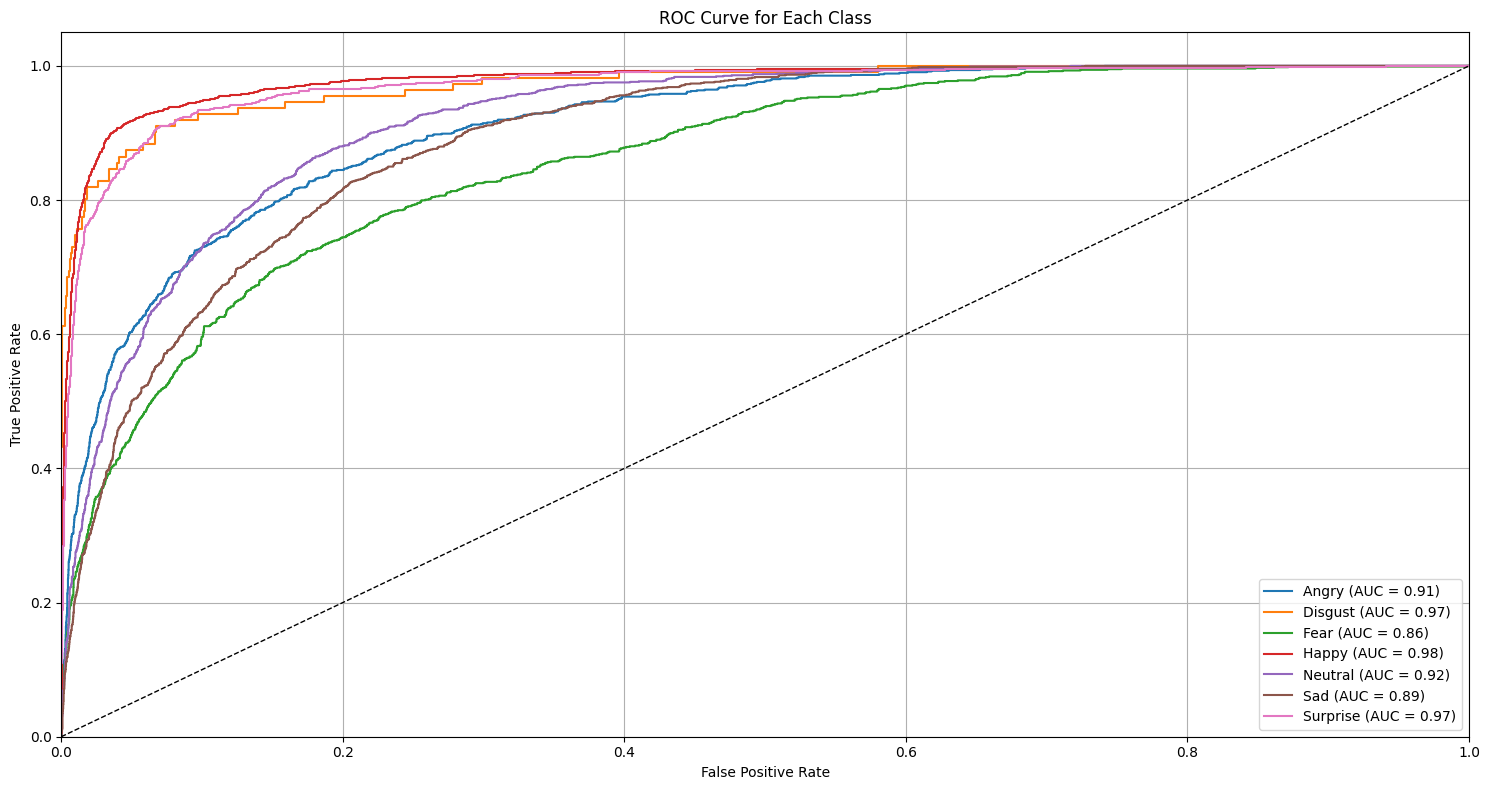

In [26]:
from sklearn.metrics import roc_curve, auc


plt.figure(figsize=(15, 8))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(labels_onehot[:, i], all_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc:.2f})")


plt.plot([0, 1], [0, 1], 'k--', lw=1)

# Plot formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Each Class")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


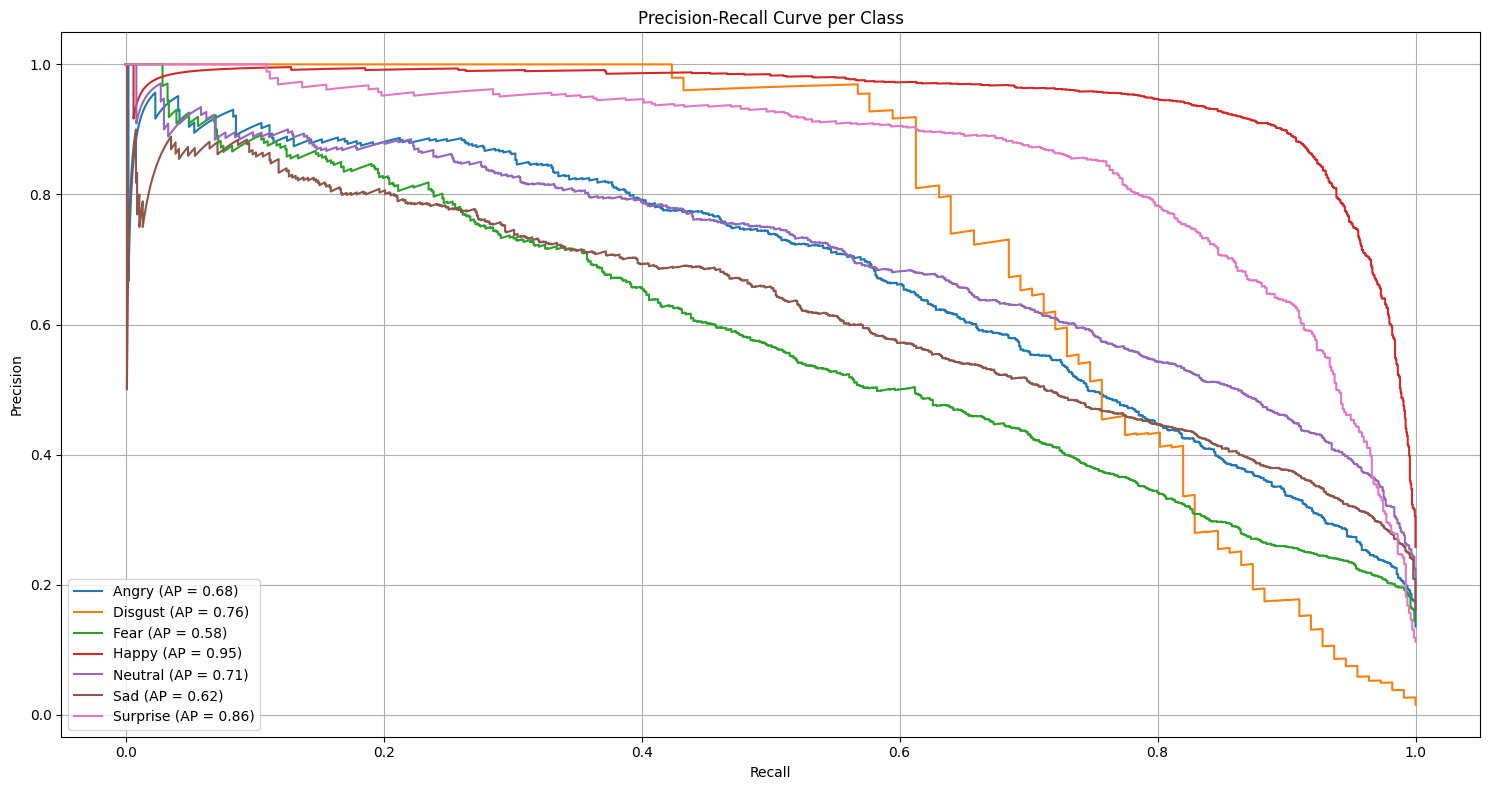

In [27]:
from sklearn.metrics import precision_recall_curve, average_precision_score


plt.figure(figsize=(15, 8))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(labels_onehot[:, i], all_probs[:, i])
    ap = average_precision_score(labels_onehot[:, i], all_probs[:, i])
    plt.plot(recall, precision, label=f"{class_names[i]} (AP = {ap:.2f})")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve per Class')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

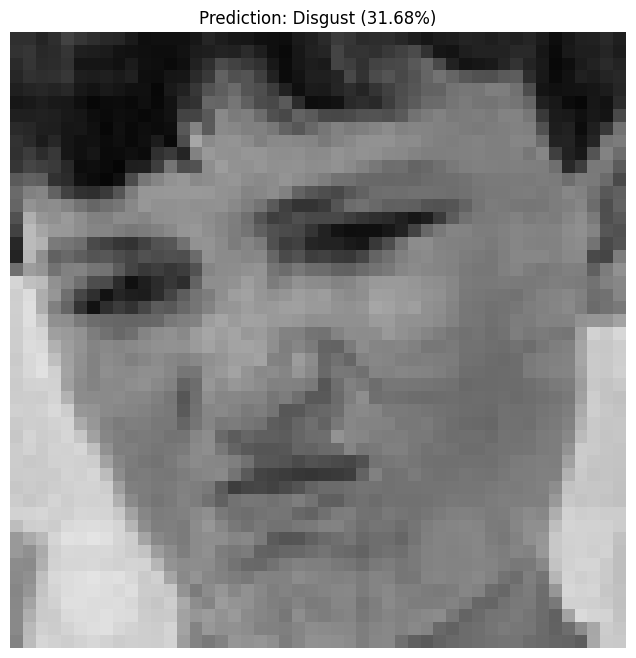

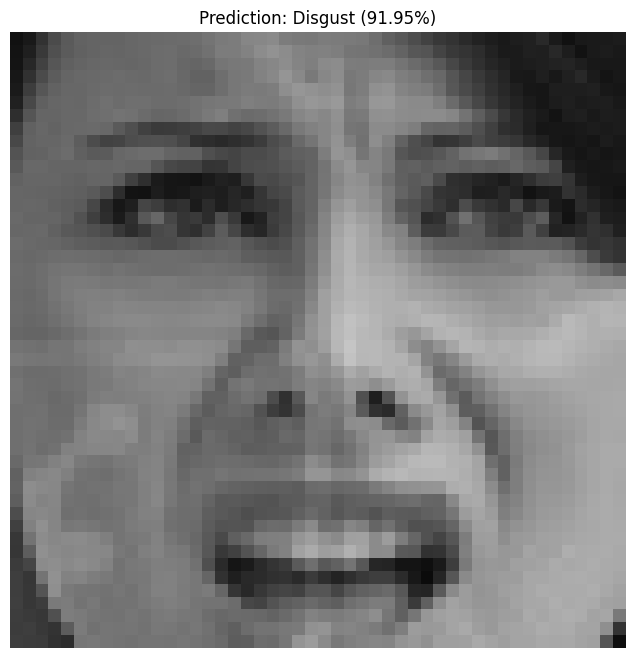

('Disgust', 0.9195438623428345)

In [28]:
def predict_and_plot_fast(image_path, model, class_names=None):
    if class_names is None and hasattr(model, "names"):
        class_names = [model.names[i] for i in range(len(model.names))]
    image = Image.open(image_path).convert("RGB")
    res = model(image, verbose=False)[0]
    idx = int(res.probs.top1)
    conf = float(getattr(res.probs, "top1conf", res.probs.data[idx].item()))
    pred = class_names[idx] if class_names else str(idx)

    plt.figure(figsize=(10,8))
    plt.imshow(image); plt.axis("off")
    plt.title(f"Prediction: {pred} ({conf*100:.2f}%)")
    plt.show()
    return pred, conf


class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
image_path = train_dir + "/disgust/10018.jpg"  # Update this path
predict_and_plot_fast(image_path, yolo_model, class_names)
predict_and_plot_fast(test_dir+'/disgust/533.jpg', yolo_model, class_names)

In [30]:
from glob import glob
import os, shutil

save_dir = "../../data/saved_models"
os.makedirs(save_dir, exist_ok=True)

# Find the latest Ultralytics classify run and copy best.pt
runs = sorted(glob("../../runs/classify/*"), key=os.path.getmtime)
if not runs:
    raise RuntimeError("No Ultralytics classify runs found in runs/classify/. Did training complete successfully?")

best_weight = os.path.join(runs[-2], "weights", "best.pt")
dst_path = os.path.join(save_dir, "yolov8n-cls-best_1.pt")
shutil.copy(best_weight, dst_path)

print(f"Model saved successfully in {dst_path}")


Model saved successfully in ../../data/saved_models/yolov8n-cls-best_1.pt
